# FORECASTING

Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#imporing data
airlines=pd.read_excel('/Users/pankaj/Documents/My Files/Ssup/Airlines+Data.xlsx')

In [3]:
airlines

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [4]:
airlines.head(10)

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
5,1995-06-01,135
6,1995-07-01,148
7,1995-08-01,148
8,1995-09-01,136
9,1995-10-01,119


In [5]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [6]:
airlines.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


# Line plot

In [7]:
# create a line plot
from pandas import read_csv
from matplotlib import pyplot

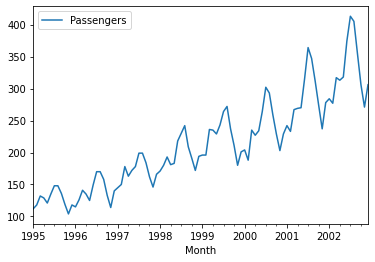

In [8]:
airlines1 =pd. read_excel("/Users/pankaj/Documents/My Files/Ssup/Airlines+Data.xlsx", header=0, index_col=0,parse_dates=True)
airlines1.plot()
pyplot.show()

In [9]:
airlines1

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


# Histogram and Density Plots

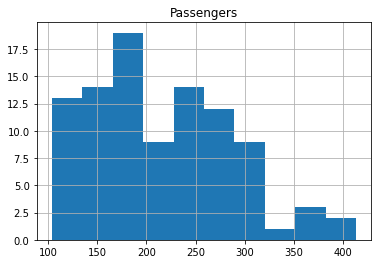

In [10]:
# create a histogram plot
airlines1.hist()
pyplot.show()

<Axes: ylabel='Density'>

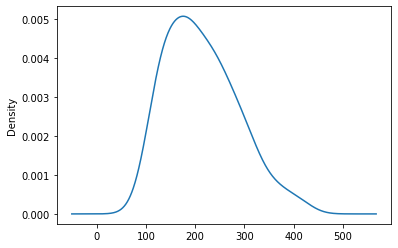

In [11]:
airlines1.Passengers.plot(kind='kde')

Lag plot

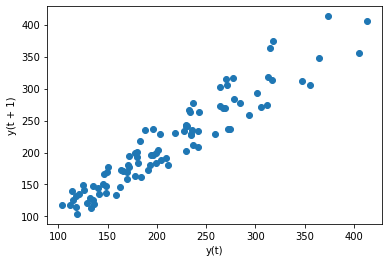

In [12]:
# create a scatter plot

from pandas.plotting import lag_plot

lag_plot(airlines1)
pyplot.show()

# ACF PLot

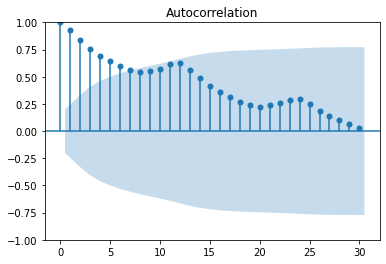

In [13]:
# create an autocorrelation plot

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(airlines1,lags=30)
pyplot.show()

# SquareTransformation

In [14]:
from pandas import read_csv
from pandas import DataFrame
from numpy import sqrt
from matplotlib import pyplot

# Upsampling the data to each and every day

In [15]:
upsampled = airlines1.resample('D').mean()
print(upsampled.head(32))

            Passengers
Month                 
1995-01-01       112.0
1995-01-02         NaN
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-07         NaN
1995-01-08         NaN
1995-01-09         NaN
1995-01-10         NaN
1995-01-11         NaN
1995-01-12         NaN
1995-01-13         NaN
1995-01-14         NaN
1995-01-15         NaN
1995-01-16         NaN
1995-01-17         NaN
1995-01-18         NaN
1995-01-19         NaN
1995-01-20         NaN
1995-01-21         NaN
1995-01-22         NaN
1995-01-23         NaN
1995-01-24         NaN
1995-01-25         NaN
1995-01-26         NaN
1995-01-27         NaN
1995-01-28         NaN
1995-01-29         NaN
1995-01-30         NaN
1995-01-31         NaN
1995-02-01       118.0


            Passengers
Month                 
1995-01-01  112.000000
1995-01-02  112.193548
1995-01-03  112.387097
1995-01-04  112.580645
1995-01-05  112.774194
1995-01-06  112.967742
1995-01-07  113.161290
1995-01-08  113.354839
1995-01-09  113.548387
1995-01-10  113.741935
1995-01-11  113.935484
1995-01-12  114.129032
1995-01-13  114.322581
1995-01-14  114.516129
1995-01-15  114.709677
1995-01-16  114.903226
1995-01-17  115.096774
1995-01-18  115.290323
1995-01-19  115.483871
1995-01-20  115.677419
1995-01-21  115.870968
1995-01-22  116.064516
1995-01-23  116.258065
1995-01-24  116.451613
1995-01-25  116.645161
1995-01-26  116.838710
1995-01-27  117.032258
1995-01-28  117.225806
1995-01-29  117.419355
1995-01-30  117.612903
1995-01-31  117.806452
1995-02-01  118.000000


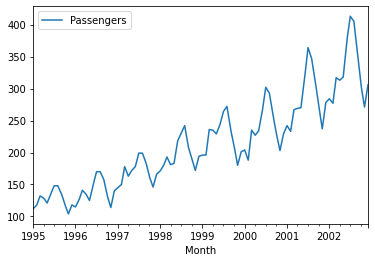

In [16]:
##### interpolate the missing value
interpolated = upsampled.interpolate(method='linear')
print(interpolated.head(32))
interpolated.plot()
pyplot.show()

# Before Transformation

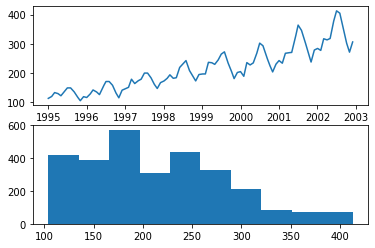

In [17]:
# line plot
pyplot.subplot(211)
pyplot.plot(interpolated)
# histogram
pyplot.subplot(212)
pyplot.hist(interpolated)
pyplot.show()

In [18]:
interpolated

,Passengers
Month,
1995-01-01,112.000000
1995-01-02,112.193548
1995-01-03,112.387097
1995-01-04,112.580645
1995-01-05,112.774194
...,...
2002-11-27,301.333333
2002-11-28,302.500000
2002-11-29,303.666667


# Square Root Transform

In [19]:
dataframe = DataFrame(interpolated)
dataframe.columns = ['Passengers']
dataframe['Passengers'] = sqrt(dataframe['Passengers'])

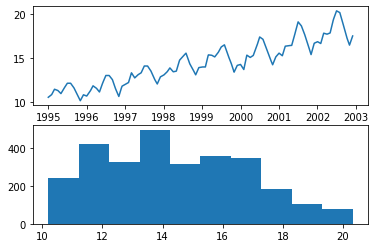

In [20]:
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['Passengers'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['Passengers'])
pyplot.show()

In [21]:
interpolated

,Passengers
Month,
1995-01-01,10.583005
1995-01-02,10.592146
1995-01-03,10.601278
1995-01-04,10.610403
1995-01-05,10.619519
...,...
2002-11-27,17.358955
2002-11-28,17.392527
2002-11-29,17.426034


# Log Transform

In [22]:
from numpy import log
dataframe = DataFrame(interpolated)
dataframe.columns = ['Passengers']
dataframe['Passengers'] = log(dataframe['Passengers'])

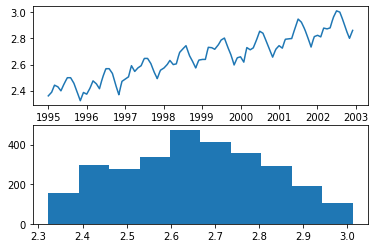

In [23]:
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['Passengers'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['Passengers'])
pyplot.show()

In [24]:
interpolated

,Passengers
Month,
1995-01-01,2.359249
1995-01-02,2.360113
1995-01-03,2.360975
1995-01-04,2.361835
1995-01-05,2.362694
...,...
2002-11-27,2.854109
2002-11-28,2.856041
2002-11-29,2.857965


In [25]:
interpolated.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2892 entries, 1995-01-01 to 2002-12-01
Freq: D
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Passengers  2892 non-null   float64
dtypes: float64(1)
memory usage: 45.2 KB


# Plotting Heatmap

In [26]:
airlines

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [27]:
airlines["Date"]=pd.to_datetime(airlines.Month,format="%b-%y")
airlines["Months"]=airlines.Date.dt.strftime("%b")
airlines["Year"]=airlines.Date.dt.strftime("%Y")

<Axes: xlabel='Months', ylabel='Year'>

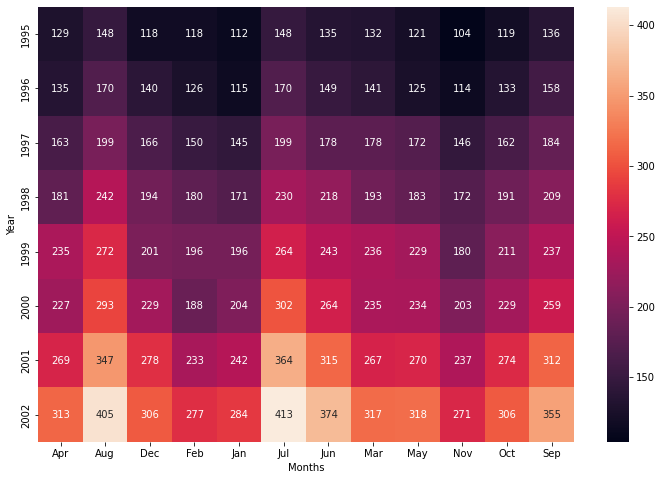

In [28]:
# Heatmap
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=airlines,values="Passengers",index="Year",columns="Months",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values

<Axes: xlabel='Months', ylabel='Passengers'>

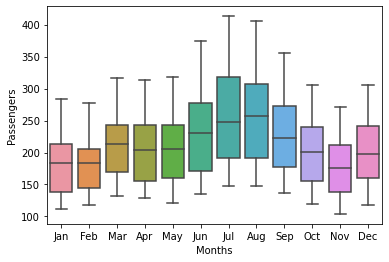

In [29]:
sns.boxplot(x="Months",y="Passengers",data=airlines)

<Axes: xlabel='Year', ylabel='Passengers'>

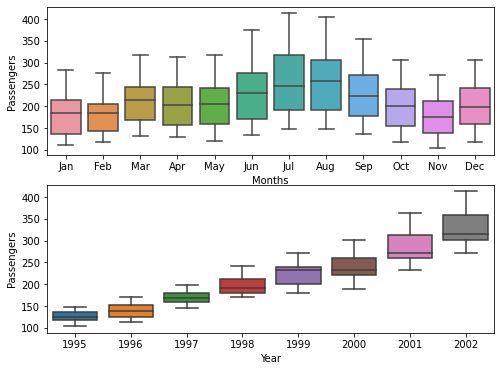

In [30]:
# Boxplot
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="Months",y="Passengers",data=airlines)
plt.subplot(212)
sns.boxplot(x="Year",y="Passengers",data=airlines)

In [31]:
Month_Dummies = pd.DataFrame(pd.get_dummies(airlines['Months']))
airline1 = pd.concat([airlines,Month_Dummies],axis = 1)

In [32]:
airline1["t"] = np.arange(1,97)
airline1["t_squared"] = airline1["t"]*airline1["t"]
airline1["Log_Passengers"] = np.log(airline1["Passengers"])

In [33]:
airline1

,Month,Passengers,Date,Months,Year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,Log_Passengers
0,1995-01-01,112,1995-01-01,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,1995-02-01,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,1995-03-01,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,1995-04-01,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,1995-05-01,May,1995,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,2002-09-01,355,2002-09-01,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,2002-10-01,306,2002-10-01,Oct,2002,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585
94,2002-11-01,271,2002-11-01,Nov,2002,0,0,0,0,0,0,0,0,0,1,0,0,95,9025,5.602119


<Axes: xlabel='Year', ylabel='Passengers'>

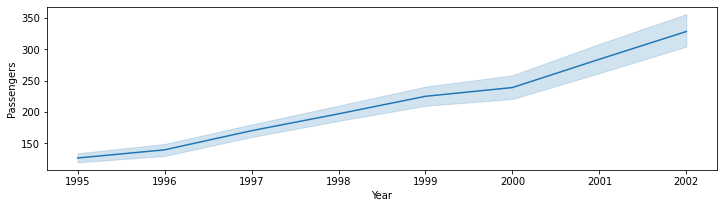

In [34]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Year",y="Passengers",data=airlines)

Moving Average

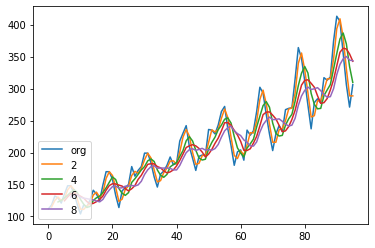

In [35]:
airlines.Passengers.plot(label="org")
for i in range(2,10,2):
    airlines["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

<Axes: >

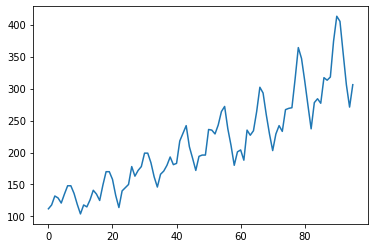

In [36]:
airlines.Passengers.plot()

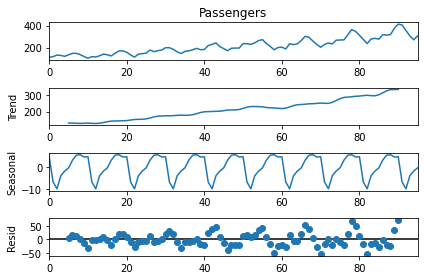

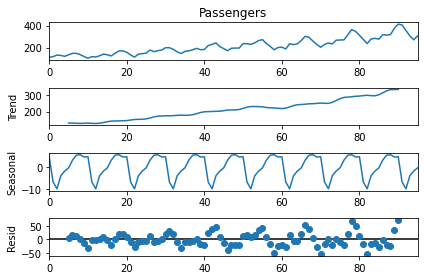

In [37]:
import statsmodels.api as smf

seasonal_ts_add=smf.tsa.seasonal_decompose(airlines["Passengers"],period=10)
seasonal_ts_add.plot()

# Dicky Fuller Test

In [38]:
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
series = airlines1
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: 1.340248
p-value: 0.996825
Critical Values:
	1%: -3.512
	5%: -2.897
	10%: -2.586


We can see that the value is larger than the critical values, meaning that we can fail to reject the null hypothesis and in turn that the time series is non-stationary.

# Exponential Smoothing

In [39]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing


model = SimpleExpSmoothing(airlines1["Passengers"])
fitted_model = model.fit(smoothing_level=0.3)  # Adjust the smoothing level as needed
airlines1["Ex_smooth"] = fitted_model.fittedvalues
airlines1["Ex_smooth"]


/Users/pankaj/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Month
1995-01-01    122.643132
1995-02-01    119.450192
1995-03-01    119.015135
1995-04-01    122.910594
1995-05-01    124.737416
                 ...    
2002-08-01    351.379218
2002-09-01    367.465453
2002-10-01    363.725817
2002-11-01    346.408072
2002-12-01    323.785650
Name: Ex_smooth, Length: 96, dtype: float64

In [40]:
airlines1.head()

,Passengers,Ex_smooth
Month,,
1995-01-01,112,122.643132
1995-02-01,118,119.450192
1995-03-01,132,119.015135
1995-04-01,129,122.910594
1995-05-01,121,124.737416


# Splitting data

In [41]:
Train = airline1.head(80)
Test = airline1.tail(16)

# Model based Forecasting using RMSE Value

In [42]:
# Linear Model
import statsmodels.formula.api as smf 
linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

47.54262406772677

In [43]:
# Exponential Model
Exp = smf.ols('Log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

43.79373939334312

In [44]:
# Quadratic Model
Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

43.65440369584205

In [45]:
# Additive seasonality
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

129.26647641443307

In [46]:
# Additive Seasonality quadrative

add_sea_Quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad=pd.Series(add_sea_Quad.predict(Test[['t','t_squared','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

23.910983570107234

In [47]:
#Multiplicative Seasonality

Mul_sea = smf.ols('Log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

135.3264841462107

In [48]:
#Multiplicative addditive seasonality

Mul_Add_sea = smf.ols('Log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

9.469000230306396

# Testing

In [49]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,47.542624
1,rmse_Exp,43.793739
2,rmse_Quad,43.654404
3,rmse_add_sea,129.266476
4,rmse_add_sea_quad,23.910984
5,rmse_Mult_sea,135.326484
6,rmse_Mult_add_sea,9.469000


# Predict with new data

In [50]:
t = np.arange(97,108)
t

array([ 97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107])

In [51]:
t_squared=np.array(t*t)
t_squared

array([ 9409,  9604,  9801, 10000, 10201, 10404, 10609, 10816, 11025,
       11236, 11449])

In [52]:
Month = pd.DataFrame({'Month':['2003-01-01','2003-02-01','2003-03-01','2003-04-01','2003-05-01','2003-06-01','2003-07-01',
                               '2003-08-01','2003-09-01','2003-10-01','2003-10-01']})

In [53]:
df={'t':t,'t_squared':t_squared}
df=pd.DataFrame(df)

In [54]:
newdata = pd.concat([Month,df],axis=1)
newdata

,Month,t,t_squared
0,2003-01-01,97,9409
1,2003-02-01,98,9604
2,2003-03-01,99,9801
3,2003-04-01,100,10000
4,2003-05-01,101,10201
5,2003-06-01,102,10404
6,2003-07-01,103,10609
7,2003-08-01,104,10816
8,2003-09-01,105,11025
9,2003-10-01,106,11236


# Build the model on entire dataset

In [55]:
model_full = smf.ols('Passengers~t',data=airline1).fit()
pred_new  = pd.Series(model_full.predict(newdata))
pred_new

0     326.941886
1     329.276598
2     331.611311
3     333.946023
4     336.280736
5     338.615448
6     340.950161
7     343.284873
8     345.619585
9     347.954298
10    350.289010
dtype: float64

In [56]:
newdata["forecasted_passengers"]=pd.Series(pred_new)

In [57]:
newdata

,Month,t,t_squared,forecasted_passengers
0,2003-01-01,97,9409,326.941886
1,2003-02-01,98,9604,329.276598
2,2003-03-01,99,9801,331.611311
3,2003-04-01,100,10000,333.946023
4,2003-05-01,101,10201,336.280736
5,2003-06-01,102,10404,338.615448
6,2003-07-01,103,10609,340.950161
7,2003-08-01,104,10816,343.284873
8,2003-09-01,105,11025,345.619585
9,2003-10-01,106,11236,347.954298


In [58]:
Train

,Month,Passengers,Date,Months,Year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,Log_Passengers
0,1995-01-01,112,1995-01-01,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,1995-02-01,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,1995-03-01,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,1995-04-01,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,1995-05-01,May,1995,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2001-04-01,269,2001-04-01,Apr,2001,1,0,0,0,0,0,0,0,0,0,0,0,76,5776,5.594711
76,2001-05-01,270,2001-05-01,May,2001,0,0,0,0,0,0,0,0,1,0,0,0,77,5929,5.598422
77,2001-06-01,315,2001-06-01,Jun,2001,0,0,0,0,0,0,1,0,0,0,0,0,78,6084,5.752573
78,2001-07-01,364,2001-07-01,Jul,2001,0,0,0,0,0,1,0,0,0,0,0,0,79,6241,5.897154


# ARIMA Model

In [59]:
from statsmodels.tsa.arima.model import ARIMA
ar=ARIMA(Train["Passengers"], order=(10,1,0))
ar_fit = ar.fit()
print(ar_fit.summary())

predictions=[]
actual=[]
a=[]
error=[]
history=[x for x in Train["Passengers"]]
for i in range(len(Test["Passengers"])):
    model=ARIMA(history,order=(10,1,0))
    model_fit=model.fit()
    output=model_fit.forecast()
    y_hat=output[0]
    predictions.append(y_hat)
    obs=Test["Passengers"][len(Train["Passengers"])+i]
    actual.append(obs)
    history.append(obs)
    a.append(i)
    error.append((obs-y_hat)/y_hat*100)
    print(i,'Predicted=',y_hat, 'Actual=',obs,'Error=',(obs-y_hat)/y_hat)  

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                   80
Model:                ARIMA(10, 1, 0)   Log Likelihood                -331.611
Date:                Thu, 03 Aug 2023   AIC                            685.223
Time:                        15:20:06   BIC                            711.286
Sample:                             0   HQIC                           695.665
                                 - 80                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0462      0.128      0.360      0.719      -0.205       0.298
ar.L2         -0.4115      0.139     -2.954      0.003      -0.685      -0.139
ar.L3         -0.1146      0.121     -0.951      0.3

In [60]:
print(predictions,actual)

[311.76892488530353, 280.0255569080139, 240.00382371395492, 239.95980393138166, 282.59209527782565, 265.29651405001164, 271.91750435127784, 307.8388240900179, 301.59799419691103, 338.1368408839467, 380.6675755807473, 388.3607111395799, 381.3338890642229, 302.6840418546603, 278.4709389414407, 276.1626580426583] [312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413, 405, 355, 306, 271, 306]


Root Mean Square Error is :
 22.663927712270752


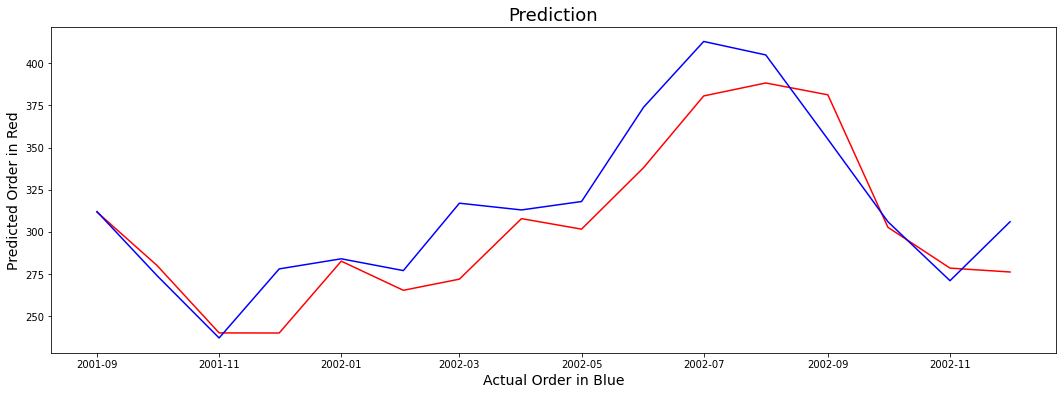

In [61]:
import math
MSE = np.square(np.subtract(actual,predictions)).mean()
RMSE = math.sqrt(MSE)
print("Root Mean Square Error is :\n", RMSE)

plt.figure(figsize=(18,6))
plt.plot(airlines["Date"][80:],predictions,color='r')
plt.plot(airlines["Date"][80:],actual,color='b')
plt.xlabel('Actual Order in Blue',fontsize=14)
plt.ylabel('Predicted Order in Red',fontsize=14)
plt.title('Prediction',fontsize=18)
plt.show()

# OBSERVATION:

1. Multiplicative Additive Seasonality gives the best prediction of least RMSE of 9.42.

2. ARIMA Model gives the RMSE of 22.66 which is lower than few of the Seasonality Model.

3. Multiplicative Seasonality have the highest RMSE of 135.32 hence not fit for prediction.